In [109]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import classification_report

In [91]:
(X_train, y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [92]:
#dans un second temps. utiliser le scale ou normalisation

X_train=X_train / 255
X_test= X_test /255

In [93]:
len(X_train)

60000

In [94]:
len(X_test)

10000

In [95]:
X_train[0].shape

(28, 28)

In [96]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

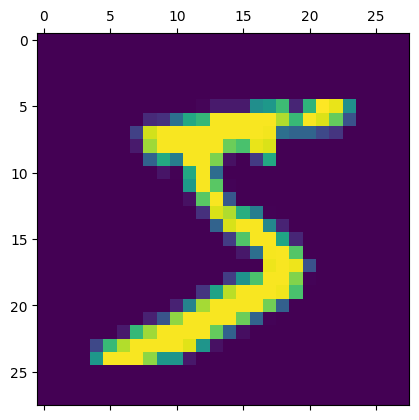

In [97]:
plt.matshow(X_train[0])

In [98]:
y_train[0]

5

In [99]:
X_train_flattend= X_train.reshape(len(X_train),28*28)

In [100]:
X_train_flattend.shape

(60000, 784)

In [101]:
X_test_flattend= X_test.reshape(len(X_test),28*28)

In [102]:
X_train_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [103]:
#simple ANN 1 layers

model= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='softmax'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
                         ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [104]:
results= model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5596 - accuracy: 0.8308
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3070 - accuracy: 0.9095
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2738 - accuracy: 0.9193
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2523 - accuracy: 0.9253
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2367 - accuracy: 0.9299


In [105]:
model.evaluate(X_test_flattend,y_test)

313/313 [==============================] - 0s 880us/step - loss: 0.2496 - accuracy: 0.9276


[0.24964171648025513, 0.9276000261306763]

[5.221949577331543, 0.8977000117301941] sans normalisation
[0.2681035101413727, 0.9258000254631042] avec normalisation, donc la normalisation améliore la précision du model

[0.24964171648025513, 0.9276000261306763]avec normalisation et couches cachées de 50, 50 et 10 neurones. La précision n'augmente pas significativement.

In [16]:
y_predicted= model.predict(X_test_flattend)

313/313 [==============================] - 0s 949us/step


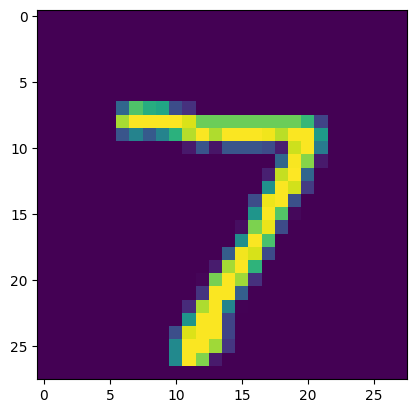

In [17]:
plt.imshow(X_test[0])

In [18]:
y_predicted[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]

In [21]:
cm=tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels)

Text(95.72222222222221, 0.5, 'truth')

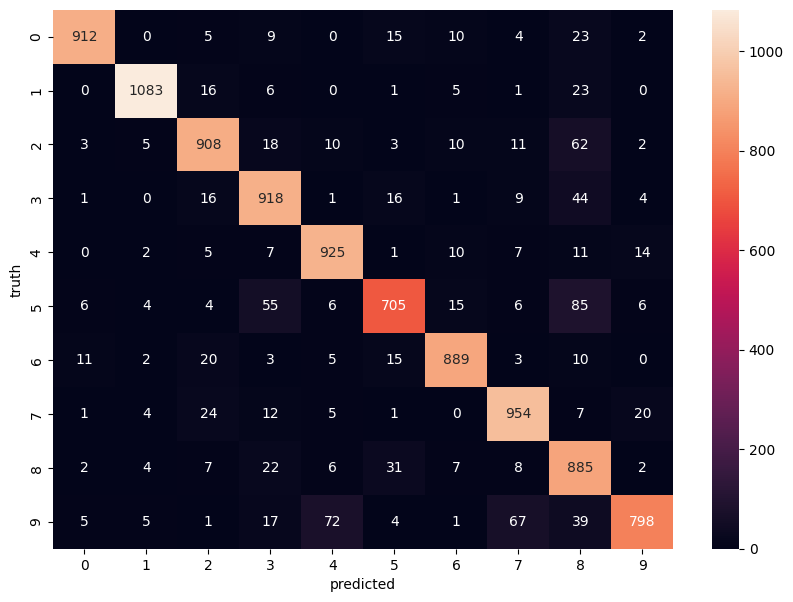

In [22]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

La matrice de confusion indique le nombre d'images représentant un certain chiffre qui ont été classées comme étant un chiffre donné.

In [106]:
#Using Flatten layer so that we don't have to call .reshape on input dataset and hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # ou keras.layers.Dense(100,input_shape=(784,)activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2756 - accuracy: 0.9224
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1255 - accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0887 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0671 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0537 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0425 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0347 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0281 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0247 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.020

In [107]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0795 - accuracy: 0.9768


[0.07949040085077286, 0.9768000245094299]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'truth')

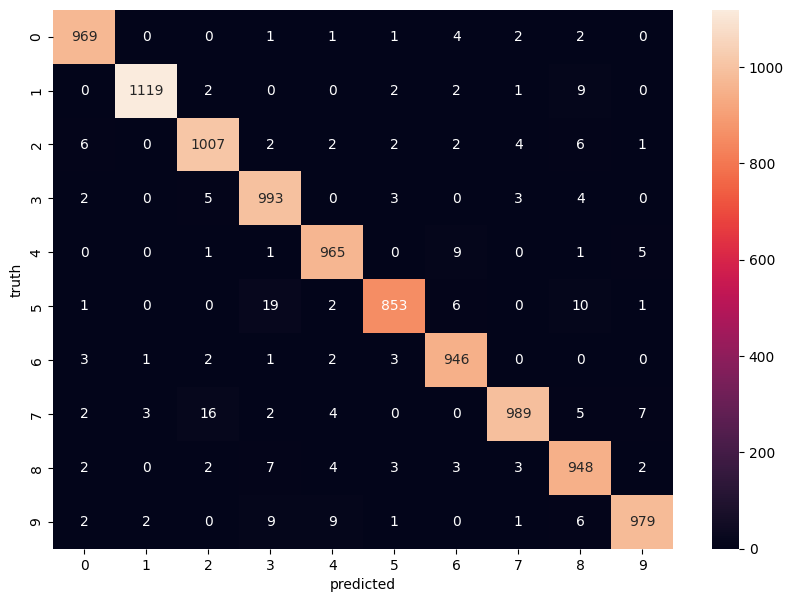

In [108]:
y_predicted= model.predict(X_test)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [111]:
print(classification_report(y_test, y_predicted_labels))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.97      0.99      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Le recall est le taux de n bien classés sur les n positifs. Le f1-score est la moyenne harmonique entre le recall et la précision.